      width < 10: 34706
10 <= width < 20: 57250
20 <= width < 30: 24885
30 <= width < 40: 13338
40 <= width < 50: 8011
50 <= width     : 20699

       width/height < 0.6: 7720
0.6 <= width/height < 0.7: 22966
0.7 <= width/height < 0.8: 46997
0.8 <= width/height < 0.9: 45458
0.9 <= width/height < 1.0: 16786
1.0 <= width/height      : 18962


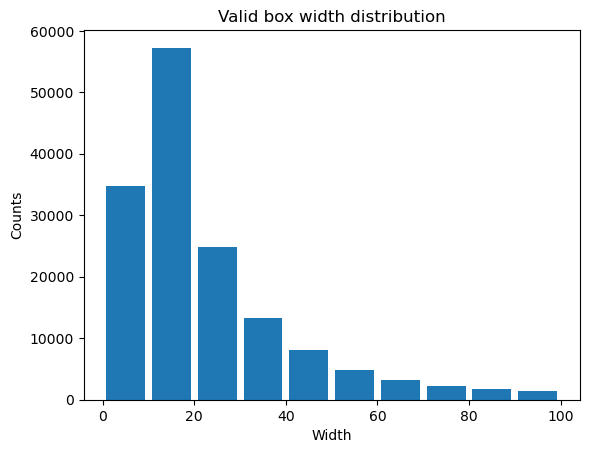

Number of invalid bounding boxes is 535.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
if __name__ == '__main__':
    anno_file = 'annotation.txt'
    data_dir = 'data_dir'
    widths=[]
    invalid=0
    ratios=[]
    count = [0,0,0,0,0,0,0,0,0,0,0,0]
    with open(anno_file, 'r') as fp:
        lines = fp.readlines()
  # Enter your code here (25%)
  # You might use the following to access each line
        for line in lines:
            #split text
            annotation=line.strip().split(' ')
            #text to int and numpy
            xy_list=[int(x) for x in annotation[1:]]
            xy_list=np.array(xy_list)
            #每組4個number
            xy_list=xy_list.reshape(-1,4)            
            for x1,y1,x2,y2 in xy_list:
                if x1>=0 and y1>=0 and x2>x1 and y2>y1:
                    w=x2-x1+1                   
                    h=y2-y1+1
                    ratio=float(w/h)
                    widths.append(w)                    
                    ratios.append(ratio)                    
                    if w<10:
                        count[0]+= 1
                    elif w>=10 and w<20:
                        count[1]+= 1
                    elif w>=20 and w<30:
                        count[2]+= 1
                    elif w>=30 and w<40:
                        count[3]+= 1
                    elif w>=40 and w<50:
                        count[4]+= 1
                    elif w>=50:
                        count[5]+= 1
                    if ratio<0.6:
                        count[6] += 1
                    elif ratio>=0.6 and ratio<0.7:
                        count[7] += 1
                    elif ratio>=0.7 and ratio<0.8:
                        count[8] += 1
                    elif ratio>=0.8 and ratio<0.9:
                        count[9] += 1
                    elif ratio>=0.9 and ratio<1.0:
                        count[10] += 1
                    elif ratio>=1.0:
                        count[11] += 1
                else:
                    invalid+=1
        print(f'      width < 10: {count[0]}')
        print(f'10 <= width < 20: {count[1]}')
        print(f'20 <= width < 30: {count[2]}')
        print(f'30 <= width < 40: {count[3]}')
        print(f'40 <= width < 50: {count[4]}')
        print(f'50 <= width     : {count[5]}')
        #plt.title('Width Distribution')
        #plt.bar(range(6),count[0:6],tick_label=['<10','10~20','20~30','30~40','40~50','>60']) 
        #plt.xlabel('width')
        #plt.ylabel('count')
        #plt.show()
        print()
        print(f'       width/height < 0.6: {count[6]}')
        print(f'0.6 <= width/height < 0.7: {count[7]}')
        print(f'0.7 <= width/height < 0.8: {count[8]}')
        print(f'0.8 <= width/height < 0.9: {count[9]}')
        print(f'0.9 <= width/height < 1.0: {count[10]}')
        print(f'1.0 <= width/height      : {count[11]}')
        #plt.title('Ratio Distribution')
        #plt.bar(range(6),count[6:12],tick_label=['<0.6','0.6~0.7','0.7~0.8','0.8~0.9','0.9~1.0','w>1.0']) 
        #plt.xlabel('ratios')
        #plt.ylabel('count')
        #plt.show()
        plt.title('Valid box width distribution')
        plt.hist(widths, range(0,101,10), rwidth=0.85)
        plt.xlabel('Width')
        plt.ylabel('Counts')
        plt.show()
        print(f'Number of invalid bounding boxes is {invalid}.')            

In [2]:
# Step 2b.5: In Step 2b.1, we only consider valid bounding boxes. How many bounding boxes are invalid? Modify the above code to find the answer. (5%)
# Write down your answer here.
#如果滿足x1>=0 and y1>=0 and x2>x1 and y2>y1代表他是合法的box，否則就非法的box，invalid count+1。
#code: invalid_Count=0 
#      if x1>=0 and y1>=0 and x2>x1 and y2>y1:
#         ---------
#         ---------
#      else:
#          #表示邊界為不合法的
#          invalid_count+=1
print(f'Number of invalid bounding boxes is {invalid}.')

Number of invalid bounding boxes is 535.
